# TAXI ORDER ANALYSIS

This study is understand the passenger preferences and the impact of external factors on rides in Chicago.Study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 6/project_sql_result_01.csv')
df4 = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 6/project_sql_result_04.csv')

## Step 4. Exploratory data analysis (Python)

In [3]:
# Opening the df1 file
print(df1.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
print(df1.tail())

                                 company_name  trips_amount
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2


In [5]:
#checking how many rows and columns the dataframe has.
df1.shape

(64, 2)

In [6]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
# opening df4 file
print(df4.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [9]:
print(df4.tail())

   dropoff_location_name  average_trips
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000


In [10]:
#checking how many rows and columns the dataframe has.
df4.shape

(94, 2)

In [11]:
df4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB




### Conclusion

We have 2 Datasets, the df1 which has 64 rows and 2 columns namely comapny_name and trips_amount, and the df4 which has 94 rows and 2 columns namely dropoff_location_name and average_trips.The average_trip in df4 is a real number data types which  be converted to int. there are no  NaN values which need to be processed.

In [13]:
# Changing the data type of average trips from real number to int.
df4= df4.astype({"average_trips": int })


####  identifying the top 10 neighborhoods in terms of drop-offs

In [14]:

df4_grouped = df4.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False)
df4.nlargest(10, 'average_trips')

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


By grouping the df4 dataframe and aggregating the average trips and getting the sum then calling the nlargest method to get the top 10 neigborhoods.

#### Top 10 neighborhoods by number of dropoffs in graph.

In [15]:
df4_top10.plot.bar(figsize = (15, 8))
plt.title(' Top 10 neighborhoods by number of dropoffs ')
plt.legend()
plt.xlabel('dropoff_location_name', size=15)
plt.ylabel('average_trips', size=15);

NameError: name 'df4_top10' is not defined

Here in the graph we can see the top 10 drop off locations, the most drop off is in Loop. by looking at the graph we will be able to know the top preferences of the passengers in terms drop off locations.As we can see most locations are  tourist attractions Airports and business districts and it could be the possible reason why this locations are on top position for drop off locations.

### taxi companies and number of rides

In [17]:
# calling the groupby  to see which company has the most number of trips.
df1_grouped = df1.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False)
df1_grouped

company_name
Flash Cab                                    19558
Taxi Affiliation Services                    11422
Medallion Leasin                             10367
Yellow Cab                                    9888
Taxi Affiliation Service Yellow               9299
                                             ...  
2733 - 74600 Benny Jona                          7
4053 - 40193 Adwar H. Nikola                     7
5874 - 73628 Sergey Cab Corp.                    5
2241 - 44667 - Felman Corp, Manuel Alonso        3
3556 - 36214 RC Andrews Cab                      2
Name: trips_amount, Length: 64, dtype: int64

Using the groupby funtion and sorting is would give us a view of the number of rides from highest to lowest.

#### Taxi companies and number of rides in graph.

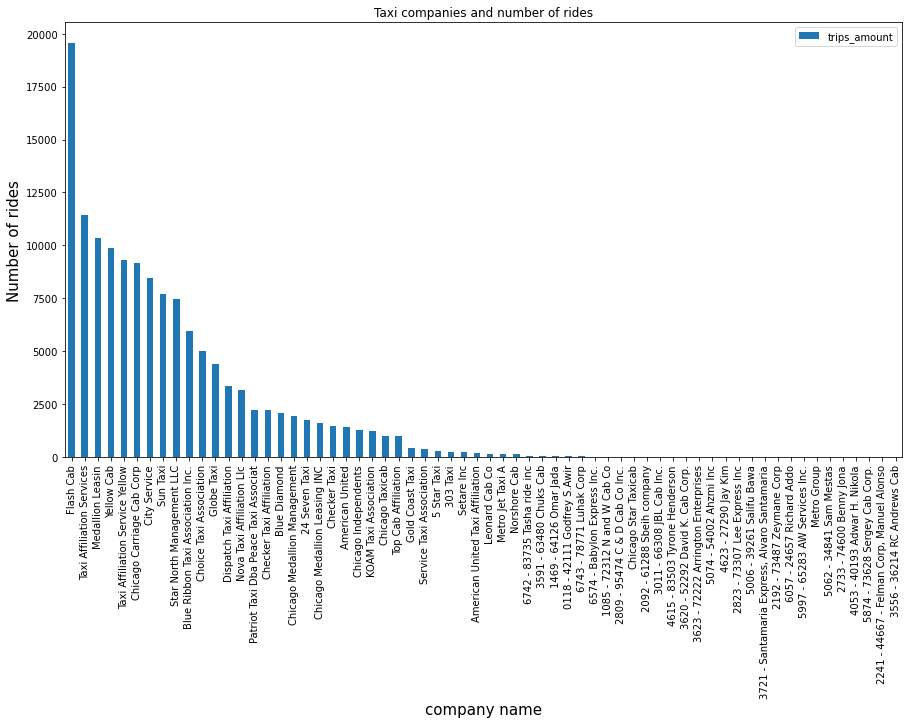

In [18]:
df1_grouped.plot.bar(figsize = (15, 8))
plt.title('Taxi companies and number of rides')
plt.legend()
plt.xlabel('company name', size=15)
plt.ylabel('Number of rides', size=15);

In this graph we can see how the number of rides was distributed to 94 taxi company,The Flash Cab company dominated the most number of rides while half of the campanies on thie list barely recoded rides. factors like inoovative services,  availability and rates could affect the preference of the passengers.

### Step 5. Testing hypotheses

We will be using a dataframe which is the result of the last query. It contains data on rides from the Loop to O'Hare International Airport.

In [21]:
# Opening the file that contains the data needed 
df7 = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 6/project_sql_result_07.csv')

In [22]:
#checking for the content
print(df7.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [23]:
print(df7.tail())

                 start_ts weather_conditions  duration_seconds
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0


In [24]:
#checking for the shape of the data frame
df7.shape

(1068, 3)

In [25]:
# Changing the data type of duration_seconds column from real number to int.
df7= df7.astype({"duration_seconds": int })

To be able to have help in formulating the hypotheses i will join 2 dataframe which contains the location name and weather condition.

In [26]:
# slice the users according to weather.
rainy_saturdays =df7[(df7['weather_conditions'] == 'Bad')]  
good_saturdays =df7[(df7['weather_conditions'] == 'Good')]


### Hypotheses 
The null hypothesis H₀, is "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays."

And The alternative hypothesis H₁, is "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [27]:
# making a slice according the duration_seconds column
Bad_sats_mean = rainy_saturdays['duration_seconds']
Good_sats_mean = good_saturdays['duration_seconds']

In [28]:
print('mean rainy_saturdays: '"{:.5}". format(rainy_saturdays['duration_seconds'].mean()))
print('mean good_saturdays: '"{:.5}". format(good_saturdays['duration_seconds'].mean()))

mean rainy_saturdays: 2427.2
mean good_saturdays: 1999.7


In [29]:
# calculated optimal value of rainy_saturdays ride duration 
optimal_value = 2427.2
# calculated optimal value of good_saturdays ride duration 
optimal_value = 1999.7

In [30]:
# we use the .05 as significance level.
alpha = 0.05

In [31]:
results = st.stats.ttest_ind(rainy_saturdays['duration_seconds'], good_saturdays['duration_seconds'], equal_var= True)

In [32]:
print('p-value:', results.pvalue )
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


In [33]:
6.517970327099473e-12 < 0.05

True

### Conclusion

Our hyphothesis suggest that the duration of rides from the loop to O'Hare International airport changes in rainy saturdays, therefore the null hyphotheses is wrong. AS the significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true. We set the alpha to 0.05 first because it a typical practice in behavioral research.